<a href="https://colab.research.google.com/github/RonitShetty/Deep-Learning-Optimizer-Tuning/blob/main/Deep-Learning-Optimizer-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Roll No: C070
#Name: Ronit Shetty
#Aim : Study of Learning rate and optimizers

In [ ]:
# =====================================================================
# STEP 1: Load the wheat seed dataset
# =====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the wheat seeds dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
column_names = ['area', 'perimeter', 'compactness', 'length_kernel',
                'width_kernel', 'asymmetry_coefficient', 'groove_length', 'variety']

# Read the dataset
df = pd.read_csv(url, sep='\s+', names=column_names, header=None)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nClass distribution:")
print(df['variety'].value_counts())

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1709986136.py:29: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep='\s+', names=column_names, header=None)


Dataset shape: (210, 8)

First 5 rows:
    area  perimeter  compactness  length_kernel  width_kernel  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   asymmetry_coefficient  groove_length  variety  
0                  2.221          5.220        1  
1                  1.018          4.956        1  
2                  2.699          4.825        1  
3                  2.259          4.805        1  
4                  1.355          5.175        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null 

In [ ]:
# =====================================================================
# STEP 2: Pre-processing and prepare the data
# =====================================================================

# a. Encoding the species names using label encoder
print("Original variety values:", df['variety'].unique())

label_encoder = LabelEncoder()
df['variety_encoded'] = label_encoder.fit_transform(df['variety'])

print("Encoded variety values:", df['variety_encoded'].unique())
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Separate features and target
X = df.drop(['variety', 'variety_encoded'], axis=1)
y = df['variety_encoded']

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)

# b. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures before normalization:")
print("Mean:", X.mean().values)
print("Std:", X.std().values)

print("\nFeatures after normalization:")
print("Mean:", X_scaled.mean(axis=0))
print("Std:", X_scaled.std(axis=0))

# c. Split into train and validate
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Validation target distribution: {np.bincount(y_val)}")

Original variety values: [1 2 3]
Encoded variety values: [0 1 2]
Label mapping: {np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(3): np.int64(2)}

Features shape: (210, 7)
Target shape: (210,)

Features before normalization:
Mean: [14.84752381 14.55928571  0.87099857  5.62853333  3.25860476  3.70020095
  5.40807143]
Std: [2.90969943 1.30595873 0.02362942 0.44306348 0.37771444 1.50355713
 0.4914805 ]

Features after normalization:
Mean: [-3.38353684e-16  1.18423789e-16  1.28574400e-15 -2.09779284e-15
 -3.38353684e-16 -3.38353684e-16 -8.98751972e-17]
Std: [1. 1. 1. 1. 1. 1. 1.]

Training set shape: (168, 7)
Validation set shape: (42, 7)
Training target distribution: [56 56 56]
Validation target distribution: [14 14 14]


In [ ]:
# =====================================================================
# STEP 3: Building the sequential neural network model
# =====================================================================

def create_model():
    """Create a sequential neural network model"""
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(3, activation='softmax')  # 3 classes for wheat varieties
    ])
    return model

# Create and display model architecture
model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,171 (12.39 KB)

 Trainable params: 3,171 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2988 - loss: 1.1206 - val_accuracy: 0.4524 - val_loss: 1.0825
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4642 - loss: 1.0434 - val_accuracy: 0.6190 - val_loss: 0.9847
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6640 - loss: 0.9108 - val_accuracy: 0.7619 - val_loss: 0.8914
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6800 - loss: 0.9049 - val_accuracy: 0.7857 - val_loss: 0.8103
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7085 - loss: 0.8443 - val_accuracy: 0.8095 - val_loss: 0.7444
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7466 - loss: 0.7613 - val_accuracy: 0.8095 - val_loss: 0.6881
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8145 - loss: 0.6908 - val_accuracy: 0.8095 - val_loss: 0.6362
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8702 - loss: 0.6302 - val_accuracy: 0.

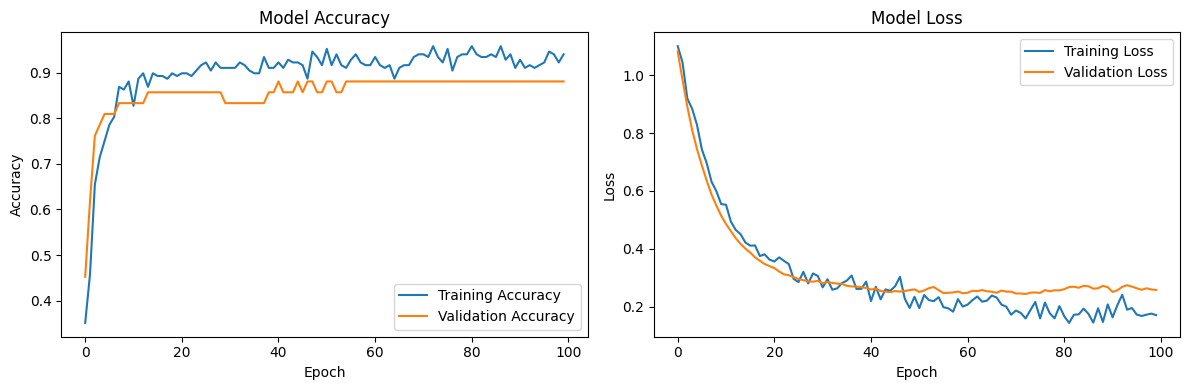

In [ ]:
# =====================================================================
# STEP 4: Compile and fit the model with SGD optimizer
# =====================================================================

# Compile the model with SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training with learning rate: 0.1

Training with learning rate: 0.01

Training with learning rate: 0.001

Training with learning rate: 0.0001


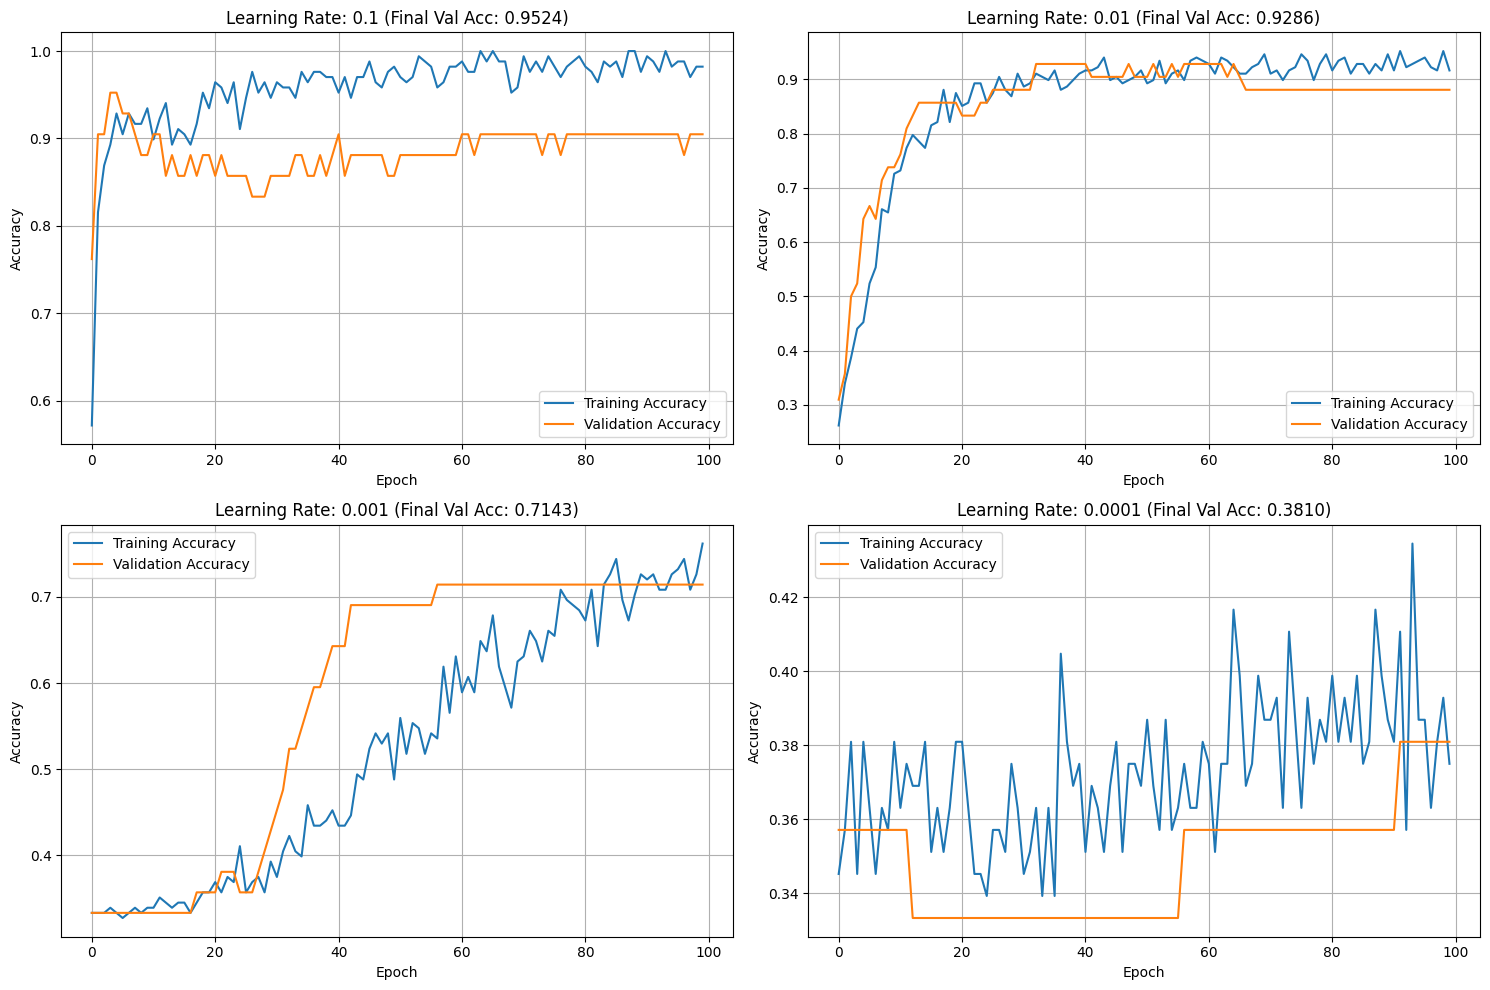


Learning Rate Results:
LR 0.1: 0.9524
LR 0.01: 0.9286
LR 0.001: 0.7143
LR 0.0001: 0.3810

Best Learning Rate: 0.1 with accuracy: 0.9524


In [ ]:
# =====================================================================
# STEP 5: Test different learning rates with SGD
# =====================================================================

learning_rates = [0.1, 0.01, 0.001, 0.0001]
lr_histories = {}
lr_results = {}

plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    print(f"\nTraining with learning rate: {lr}")

    # Create new model
    model_lr = create_model()

    # Compile with current learning rate
    model_lr.compile(
        optimizer=SGD(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history_lr = model_lr.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        verbose=0
    )

    lr_histories[lr] = history_lr

    # Store final validation accuracy
    final_val_acc = max(history_lr.history['val_accuracy'])
    lr_results[lr] = final_val_acc

    # Plot training curves
    plt.subplot(2, 2, i+1)
    plt.plot(history_lr.history['accuracy'], label='Training Accuracy')
    plt.plot(history_lr.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Learning Rate: {lr} (Final Val Acc: {final_val_acc:.4f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Find best learning rate
best_lr = max(lr_results, key=lr_results.get)
print(f"\nLearning Rate Results:")
for lr, acc in lr_results.items():
    print(f"LR {lr}: {acc:.4f}")
print(f"\nBest Learning Rate: {best_lr} with accuracy: {lr_results[best_lr]:.4f}")


Training with momentum: 0.0

Training with momentum: 0.5

Training with momentum: 0.9

Training with momentum: 0.99


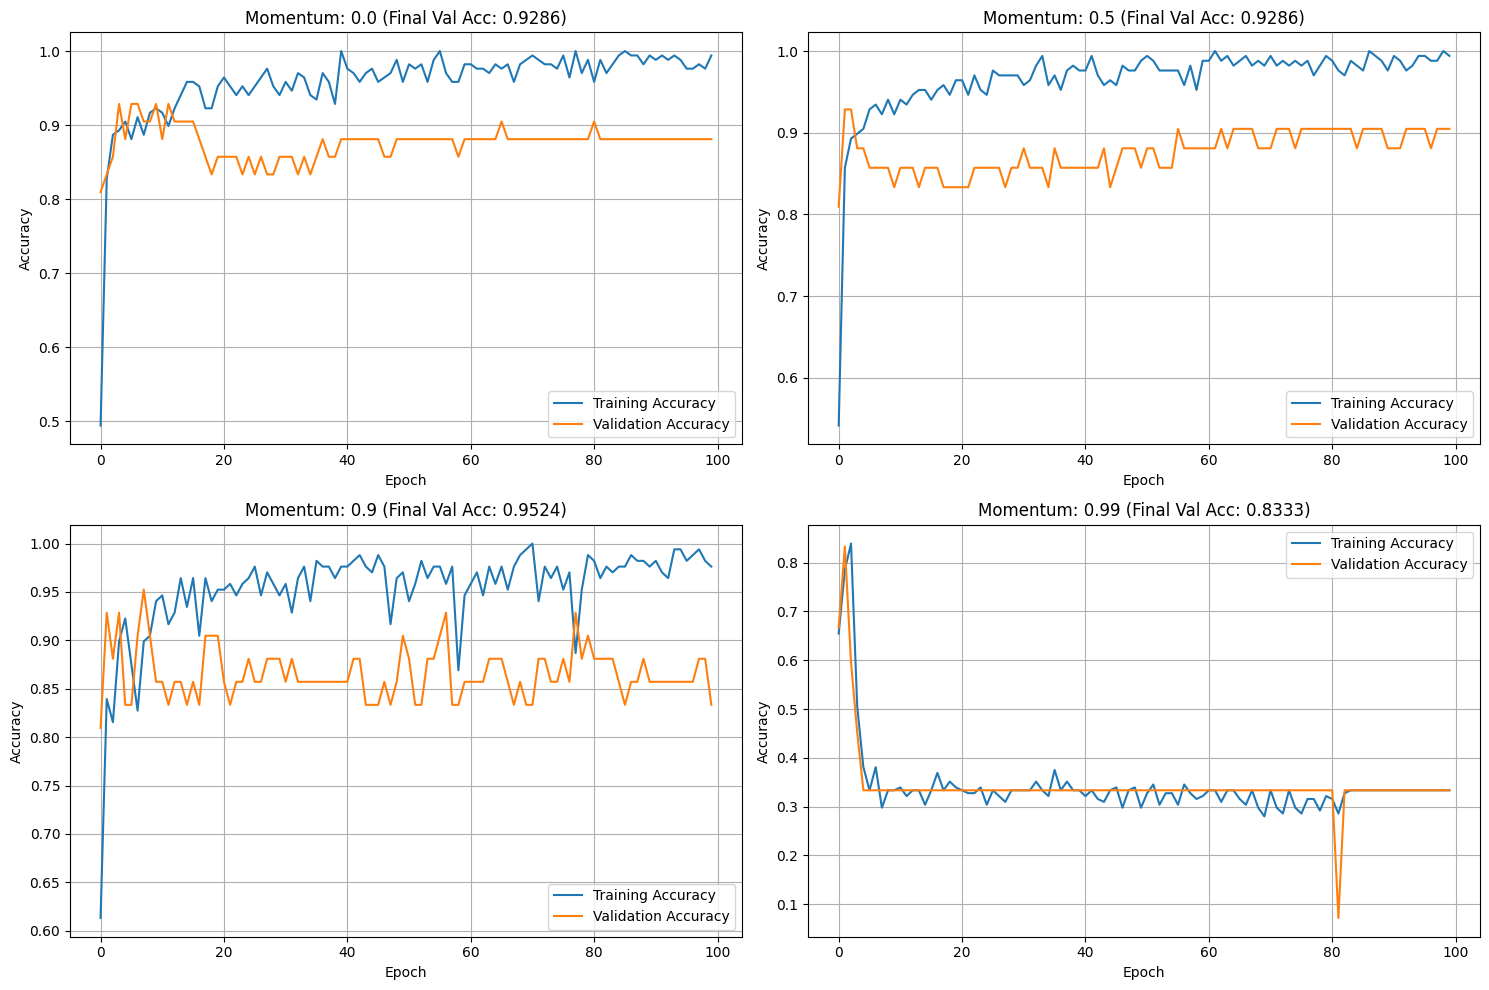


Momentum Results:
Momentum 0.0: 0.9286
Momentum 0.5: 0.9286
Momentum 0.9: 0.9524
Momentum 0.99: 0.8333

Best Momentum: 0.9 with accuracy: 0.9524


In [ ]:
# =====================================================================
# STEP 6: Test different momentum values with best learning rate
# =====================================================================

momentum_values = [0.0, 0.5, 0.9, 0.99]  # Ensure all values are floats
momentum_histories = {}
momentum_results = {}

plt.figure(figsize=(15, 10))

for i, momentum in enumerate(momentum_values):
    print(f"\nTraining with momentum: {momentum}")

    # Create new model
    model_momentum = create_model()

    # Compile with best learning rate and current momentum
    # Explicitly convert momentum to float to avoid any type issues
    model_momentum.compile(
        optimizer=SGD(learning_rate=float(best_lr), momentum=float(momentum)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history_momentum = model_momentum.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        verbose=0
    )

    momentum_histories[momentum] = history_momentum

    # Store final validation accuracy
    final_val_acc = max(history_momentum.history['val_accuracy'])
    momentum_results[momentum] = final_val_acc

    # Plot training curves
    plt.subplot(2, 2, i+1)
    plt.plot(history_momentum.history['accuracy'], label='Training Accuracy')
    plt.plot(history_momentum.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Momentum: {momentum} (Final Val Acc: {final_val_acc:.4f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Find best momentum
best_momentum = max(momentum_results, key=momentum_results.get)
print(f"\nMomentum Results:")
for momentum, acc in momentum_results.items():
    print(f"Momentum {momentum}: {acc:.4f}")
print(f"\nBest Momentum: {best_momentum} with accuracy: {momentum_results[best_momentum]:.4f}")


Training with decay: 0.1

Training with decay: 0.01

Training with decay: 0.001

Training with decay: 0.0001


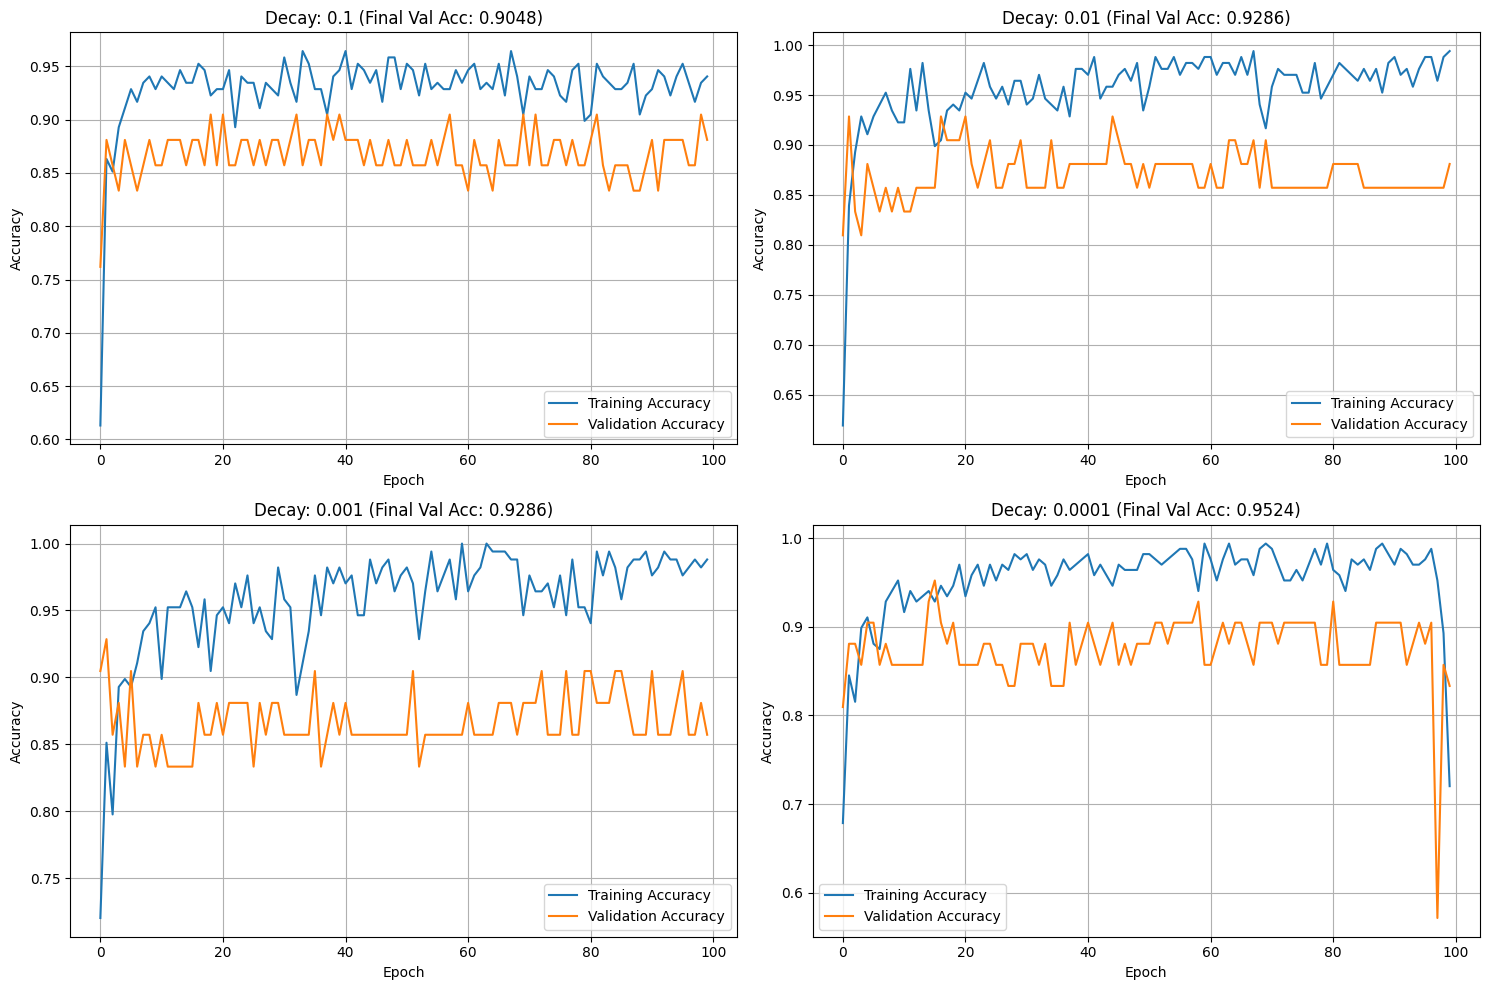


Decay Results:
Decay 0.1: 0.9048
Decay 0.01: 0.9286
Decay 0.001: 0.9286
Decay 0.0001: 0.9524

Best Decay: 0.0001 with accuracy: 0.9524


In [ ]:
# =====================================================================
# STEP 7: Test different decay values
# =====================================================================

decay_values = [1e-1, 1e-2, 1e-3, 1e-4]
decay_histories = {}
decay_results = {}

plt.figure(figsize=(15, 10))

for i, decay in enumerate(decay_values):
    print(f"\nTraining with decay: {decay}")

    # Create new model
    model_decay = create_model()

    # Compile with best parameters and current decay
    model_decay.compile(
        optimizer=SGD(learning_rate=float(best_lr), momentum=float(best_momentum), weight_decay=float(decay)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history_decay = model_decay.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        verbose=0
    )

    decay_histories[decay] = history_decay

    # Store final validation accuracy
    final_val_acc = max(history_decay.history['val_accuracy'])
    decay_results[decay] = final_val_acc

    # Plot training curves
    plt.subplot(2, 2, i+1)
    plt.plot(history_decay.history['accuracy'], label='Training Accuracy')
    plt.plot(history_decay.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Decay: {decay} (Final Val Acc: {final_val_acc:.4f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Find best decay
best_decay = max(decay_results, key=decay_results.get)
print(f"\nDecay Results:")
for decay, acc in decay_results.items():
    print(f"Decay {decay}: {acc:.4f}")
print(f"\nBest Decay: {best_decay} with accuracy: {decay_results[best_decay]:.4f}")


Training with optimizer: SGD

Training with optimizer: Adam

Training with optimizer: Adagrad

Training with optimizer: RMSprop


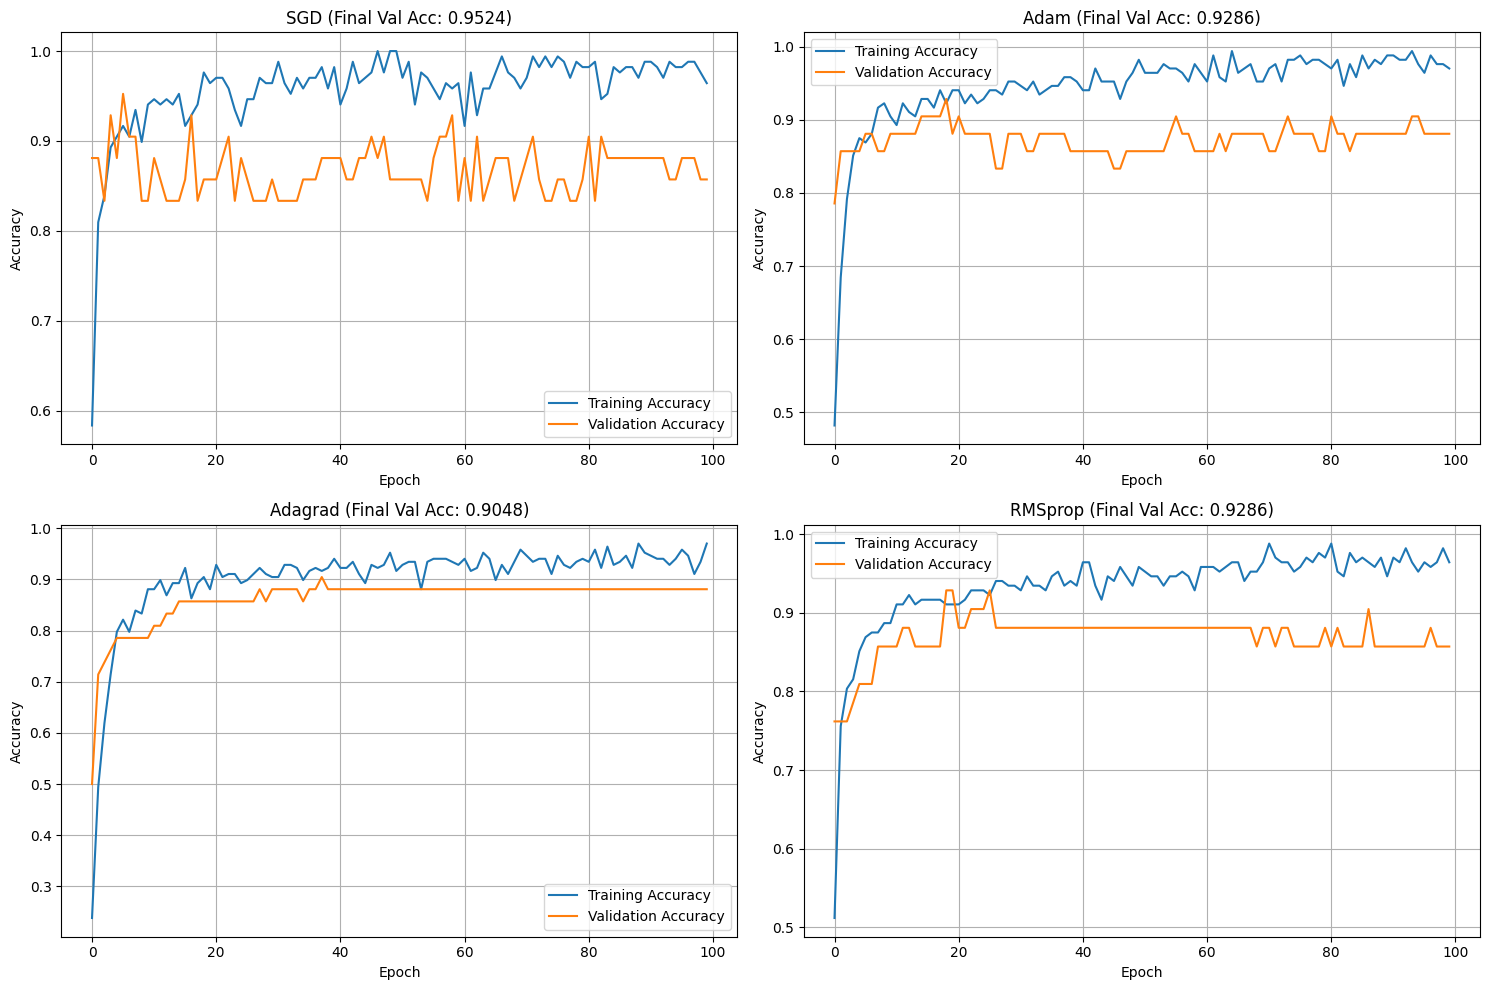


Optimizer Results:
SGD: 0.9524
Adam: 0.9286
Adagrad: 0.9048
RMSprop: 0.9286

Best Optimizer: SGD with accuracy: 0.9524


In [ ]:
# =====================================================================
# STEP 8: Compare different optimizers
# =====================================================================

optimizers = {
    'SGD': SGD(learning_rate=float(best_lr), momentum=float(best_momentum), weight_decay=float(best_decay)),
    'Adam': Adam(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.001)
}

optimizer_histories = {}
optimizer_results = {}

plt.figure(figsize=(15, 10))

for i, (name, optimizer) in enumerate(optimizers.items()):
    print(f"\nTraining with optimizer: {name}")

    # Create new model
    model_opt = create_model()

    # Compile with current optimizer
    model_opt.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history_opt = model_opt.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        verbose=0
    )

    optimizer_histories[name] = history_opt

    # Store final validation accuracy
    final_val_acc = max(history_opt.history['val_accuracy'])
    optimizer_results[name] = final_val_acc

    # Plot training curves
    plt.subplot(2, 2, i+1)
    plt.plot(history_opt.history['accuracy'], label='Training Accuracy')
    plt.plot(history_opt.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} (Final Val Acc: {final_val_acc:.4f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Find best optimizer
best_optimizer = max(optimizer_results, key=optimizer_results.get)
print(f"\nOptimizer Results:")
for optimizer, acc in optimizer_results.items():
    print(f"{optimizer}: {acc:.4f}")
print(f"\nBest Optimizer: {best_optimizer} with accuracy: {optimizer_results[best_optimizer]:.4f}")

FINAL ANALYSIS AND CONCLUSIONS

Best Learning Rate: 0.1
Best Momentum: 0.9
Best Decay: 0.0001
Best Optimizer: SGD


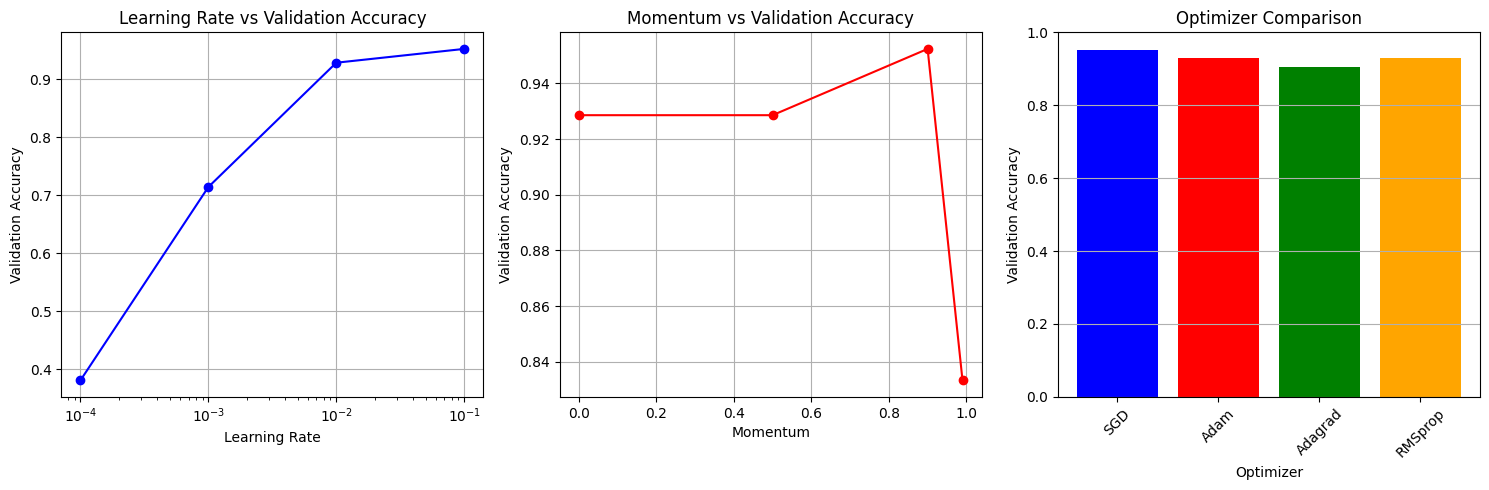


Training final model with best configuration:
Optimizer: SGD
Learning Rate: 0.1
Momentum: 0.9
Decay: 0.0001
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7306 - loss: 0.7256 - val_accuracy: 0.9286 - val_loss: 0.2313
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8949 - loss: 0.3942 - val_accuracy: 0.8810 - val_loss: 0.4346
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8289 - loss: 0.4935 - val_accuracy: 0.8810 - val_loss: 0.4460
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9097 - loss: 0.3073 - val_accuracy: 0.8810 - val_loss: 0.3040
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8912 - loss: 0.2877 - val_accuracy: 0.8810 - val_loss: 0.2590
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9242 - loss: 0.2125 - val_accuracy: 0.8810 - val_loss: 0.4945
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9600 - loss: 0.2044 - val_accuracy: 0.9048 - val_loss: 0.2739


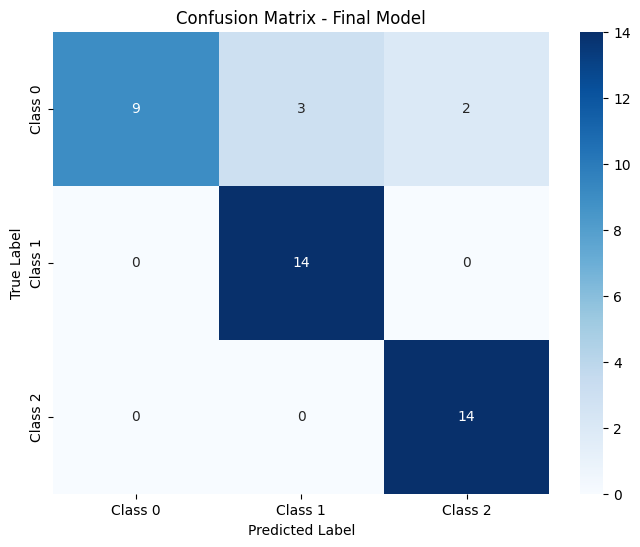

EXPERIMENT SUMMARY
Dataset: Wheat Seeds (210 samples, 7 features, 3 classes)
Best configuration found:
  - Optimizer: SGD
  - Learning Rate: 0.1
  - Momentum: 0.9
  - Decay: 0.0001
  - Final Validation Accuracy: 0.8810


In [ ]:
# =====================================================================
# STEP 9: Final conclusions and recommendations
# =====================================================================

print("FINAL ANALYSIS AND CONCLUSIONS")

print(f"\nBest Learning Rate: {best_lr}")
print(f"Best Momentum: {best_momentum}")
print(f"Best Decay: {best_decay}")
print(f"Best Optimizer: {best_optimizer}")

# Create comparison plot
plt.figure(figsize=(15, 5))

# Learning rate comparison
plt.subplot(1, 3, 1)
lrs, accs = zip(*sorted(lr_results.items()))
plt.semilogx(lrs, accs, 'bo-')
plt.title('Learning Rate vs Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.grid(True)

# Momentum comparison
plt.subplot(1, 3, 2)
moments, accs = zip(*sorted(momentum_results.items()))
plt.plot(moments, accs, 'ro-')
plt.title('Momentum vs Validation Accuracy')
plt.xlabel('Momentum')
plt.ylabel('Validation Accuracy')
plt.grid(True)

# Optimizer comparison
plt.subplot(1, 3, 3)
opts, accs = zip(*optimizer_results.items())
plt.bar(opts, accs, color=['blue', 'red', 'green', 'orange'])
plt.title('Optimizer Comparison')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Train final model with best configuration
print(f"\nTraining final model with best configuration:")
print(f"Optimizer: {best_optimizer}")
if best_optimizer == 'SGD':
    print(f"Learning Rate: {best_lr}")
    print(f"Momentum: {best_momentum}")
    print(f"Decay: {best_decay}")

final_model = create_model()

if best_optimizer == 'SGD':
    final_optimizer = SGD(learning_rate=float(best_lr), momentum=float(best_momentum), weight_decay=float(best_decay))
else:
    final_optimizer = optimizers[best_optimizer]

final_model.compile(
    optimizer=final_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=1
)

# Final evaluation
train_loss, train_acc = final_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = final_model.evaluate(X_val, y_val, verbose=0)

print(f"\nFinal Model Performance:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Predictions and classification report
y_pred = final_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_classes,
                          target_names=[f'Class {i}' for i in range(3)]))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(3)],
            yticklabels=[f'Class {i}' for i in range(3)])
plt.title('Confusion Matrix - Final Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("EXPERIMENT SUMMARY")
print(f"Dataset: Wheat Seeds (210 samples, 7 features, 3 classes)")
print(f"Best configuration found:")
print(f"  - Optimizer: {best_optimizer}")
if best_optimizer == 'SGD':
    print(f"  - Learning Rate: {best_lr}")
    print(f"  - Momentum: {best_momentum}")
    print(f"  - Decay: {best_decay}")
print(f"  - Final Validation Accuracy: {val_acc:.4f}")